# Final report code

## *Importing libraries*

In [1]:
import gzip
import json
import string
import re
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as sm

import pandas as pd
import plotly

from collections import Counter
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer

## *Analyzing listings.csv*

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132]),
 [Text(0, 0, 'capitol heights'),
  Text(1, 0, 'evergreen park'),
  Text(2, 0, 'bedstuy'),
  Text(3, 0, 'longislandcity'),
  Text(4, 0, 'calumet park'),
  Text(5, 0, 'aurora'),
  Text(6, 0, 'lawrence'),
  Text(7, 0, 'hollis'),
  Text(8, 0, 'engle

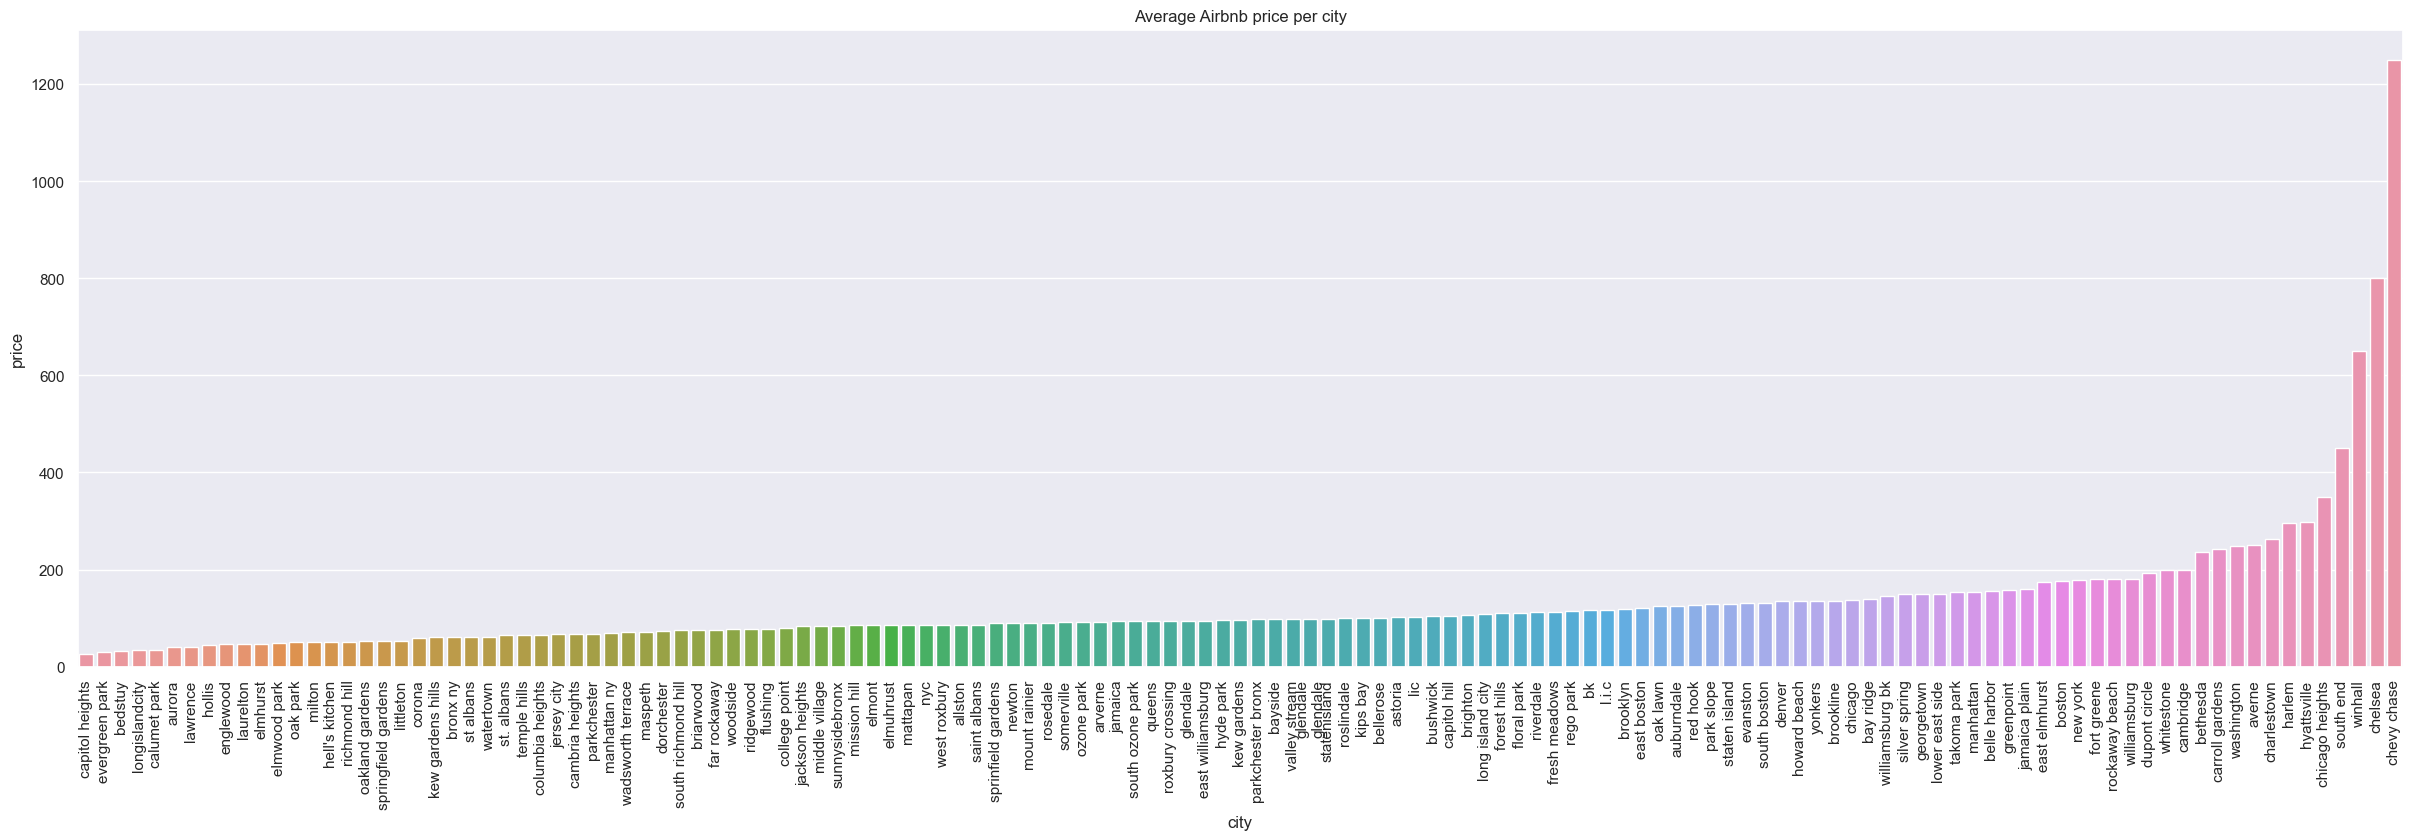

In [2]:
listingsDF = pd.read_csv("datasets/listings.csv")
listingsDF = listingsDF[listingsDF["price"].notna()]
listingsDF = listingsDF[listingsDF["price"].notnull()]
listingsDF2 = listingsDF.groupby(by="city").mean().reset_index().sort_values(by=["price"])
listingsDF3 = listingsDF2
sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=listingsDF2,x="city",y="price").set(title="Average Airbnb price per city")
plt.pyplot.xticks(rotation=90)

[Text(0.5, 1.0, 'Airbnb price for Chevy Chase')]

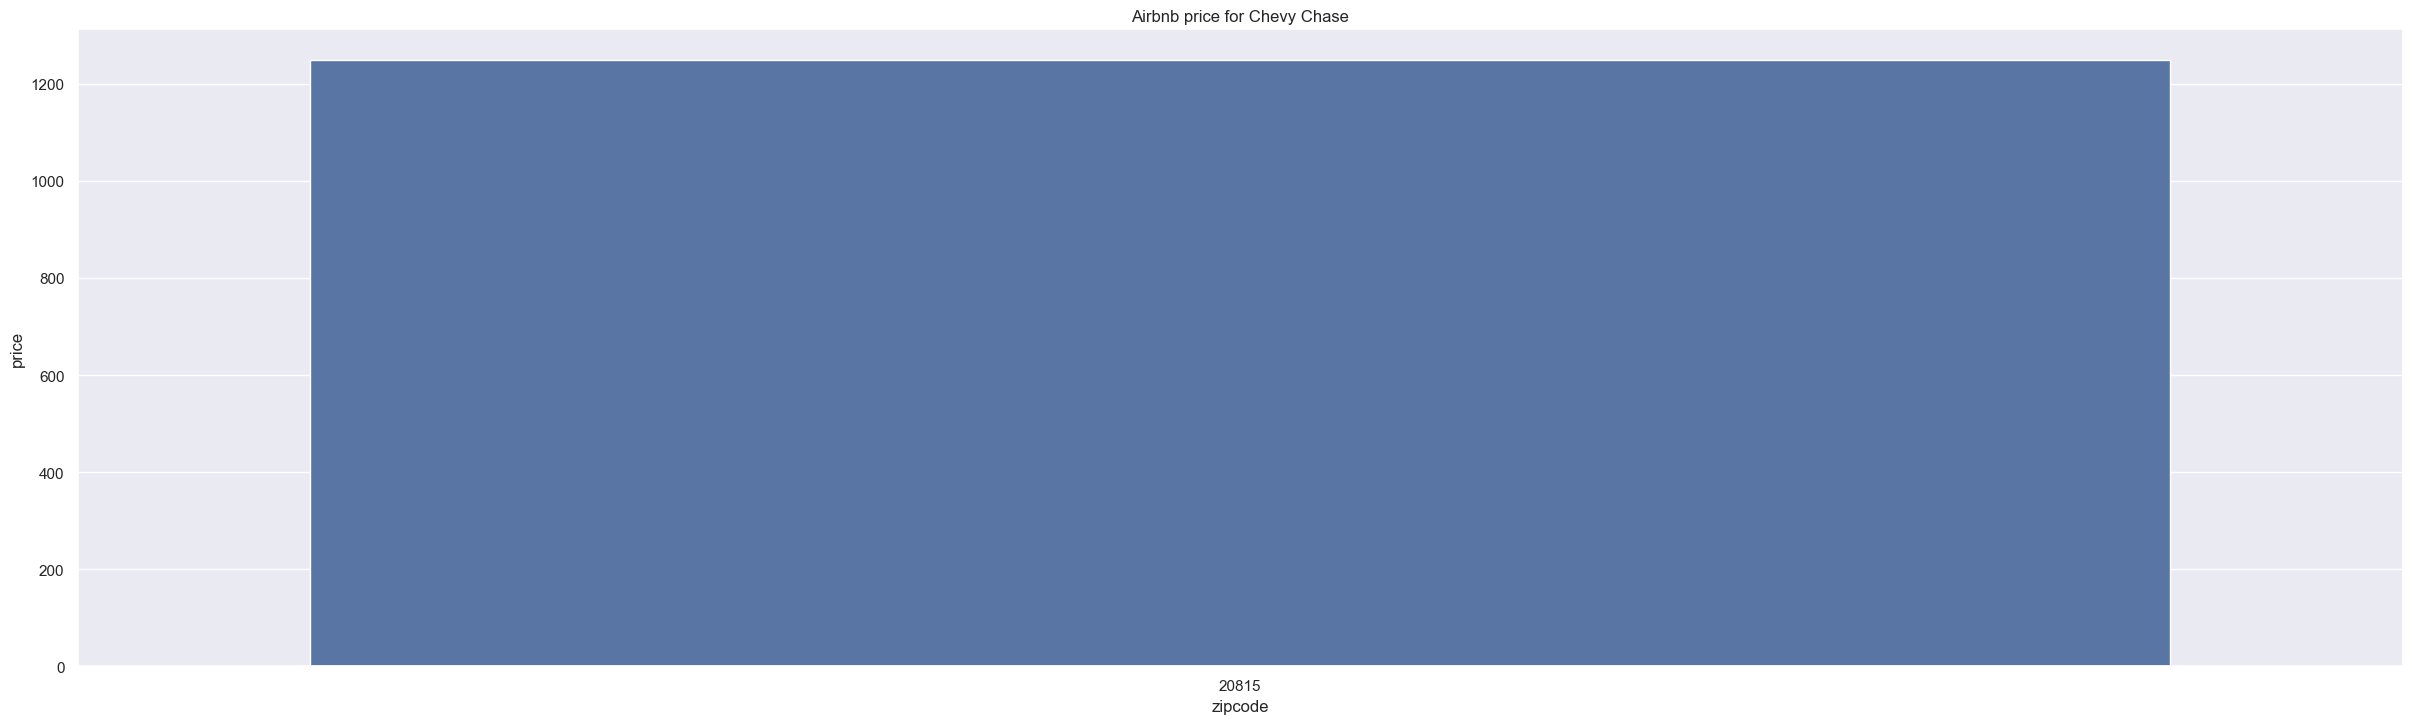

In [3]:
listingsDF = listingsDF[listingsDF["city"].notna()]
listingsDF = listingsDF[listingsDF["city"].notnull()]
listingsDF2 = listingsDF[listingsDF['city'].str.contains("chevy chase")]
sns.barplot(data=listingsDF2,x="zipcode",y="price").set(title="Airbnb price for Chevy Chase")

       accommodates                                          amenities  \
53177           2.0  {TV,Internet,"Wireless Internet","Air conditio...   
54489           4.0  {Internet,"Wireless Internet","Air conditionin...   
54496           2.0  {Internet,"Wireless Internet","Air conditionin...   
54501           1.0  {Internet,"Wireless Internet","Air conditionin...   
54512           1.0  {Internet,"Wireless Internet","Air conditionin...   
54523           1.0  {Internet,"Wireless Internet","Air conditionin...   
54524           1.0  {Internet,"Wireless Internet","Air conditionin...   
54537          11.0  {"Wireless Internet","Air conditioning","Free ...   
54538           1.0  {Internet,"Wireless Internet","Air conditionin...   
54540           2.0  {Internet,"Wireless Internet","Air conditionin...   
59823           2.0  {TV,Internet,"Wireless Internet","Air conditio...   

       availability_30  bathrooms  bed_type  bedrooms  beds  \
53177               30        1.0    Airbed     

[Text(0.5, 1.0, 'Airbnb price for Capitol Heights')]

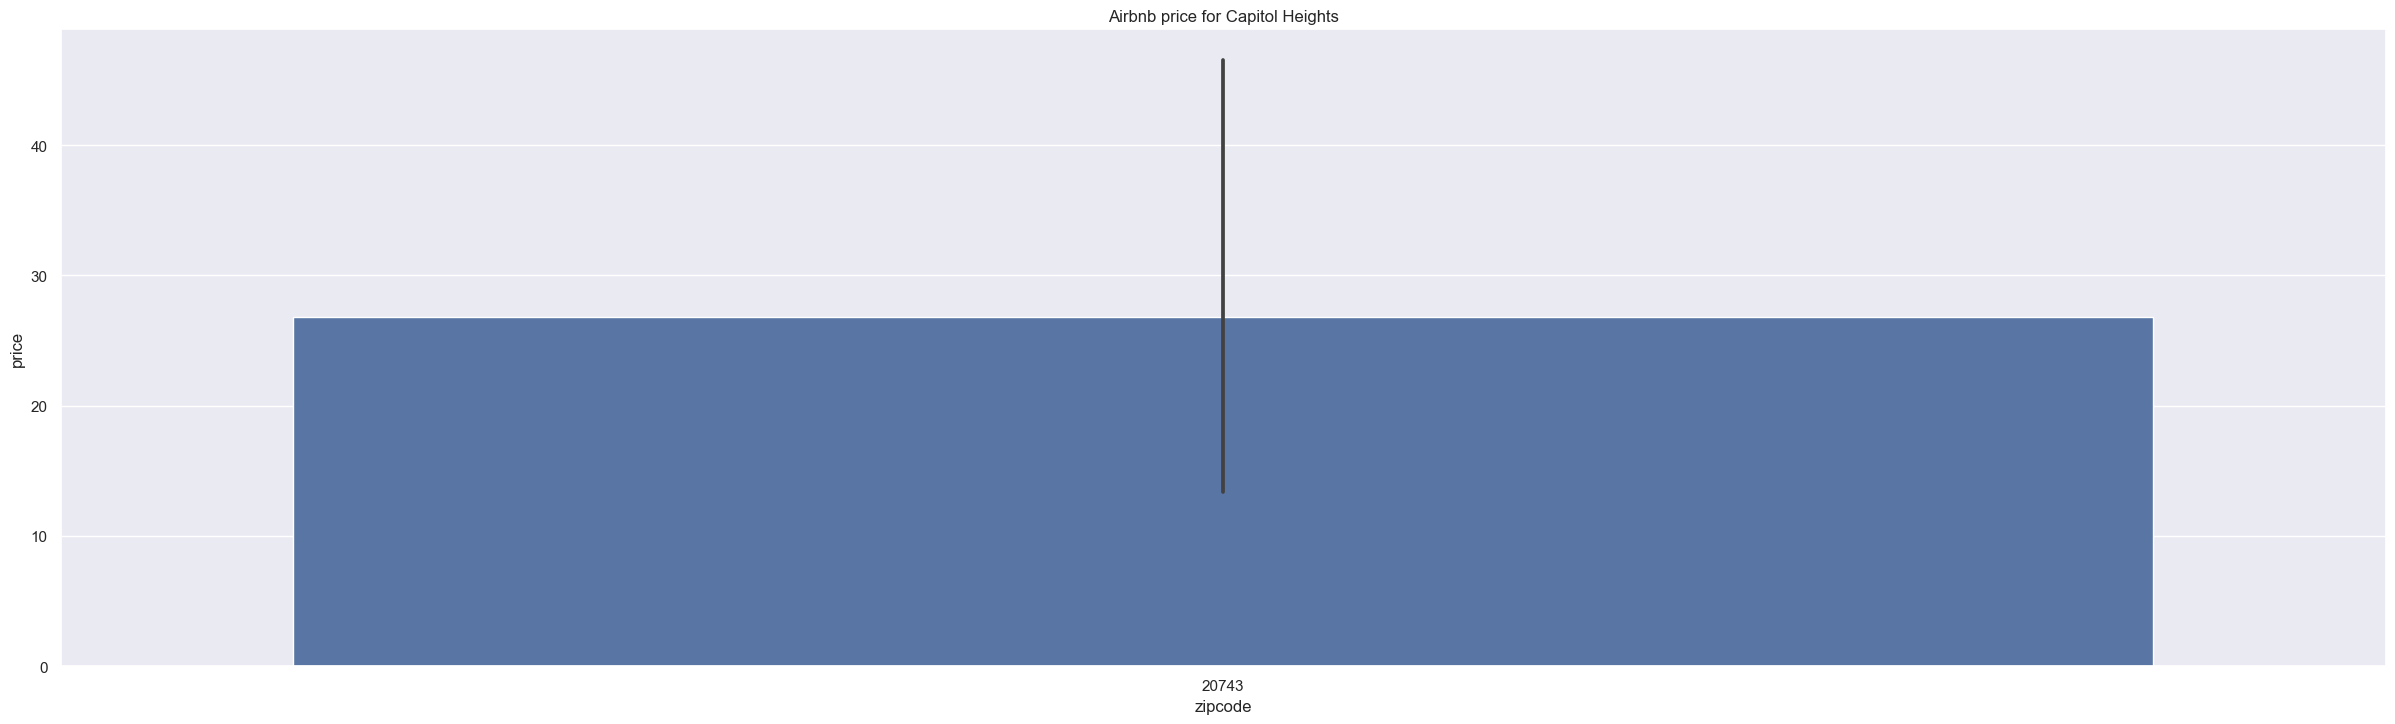

In [4]:
listingsDF2 = listingsDF[listingsDF['city'].str.contains("capitol heights")]
print(listingsDF2)
sns.barplot(data=listingsDF2,x="zipcode",y="price").set(title="Airbnb price for Capitol Heights")

## *Analyzing demographics.csv*

C:\Users\David\AppData\Local\Temp\ipykernel_10776\2601041499.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingsDF2["zipcode"] = listingsDF2["zipcode"].astype(int)
C:\Users\David\AppData\Local\Temp\ipykernel_10776\2601041499.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographicsDF2["mean_household_income"] = demographicsDF2["mean_household_income"].astype(int)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'bronx ny'),
  Text(1, 0, 'calumet park'),
  Text(2, 0, 'bedstuy'),
  Text(3, 0, 'mission hill'),
  Text(4, 0, 'roxbury crossing'),
  Text(5, 0, 'sunnysidebronx'),
  Text(6, 0, 'chicago heights'),
  Text(7, 0, 'mattapan'),
  Text(8, 0, 'corona'),
  Text(9, 0, 'far rockaway'),
  Text(10, 0, 'parkchester'),
  Text(11, 0, 'parkchester

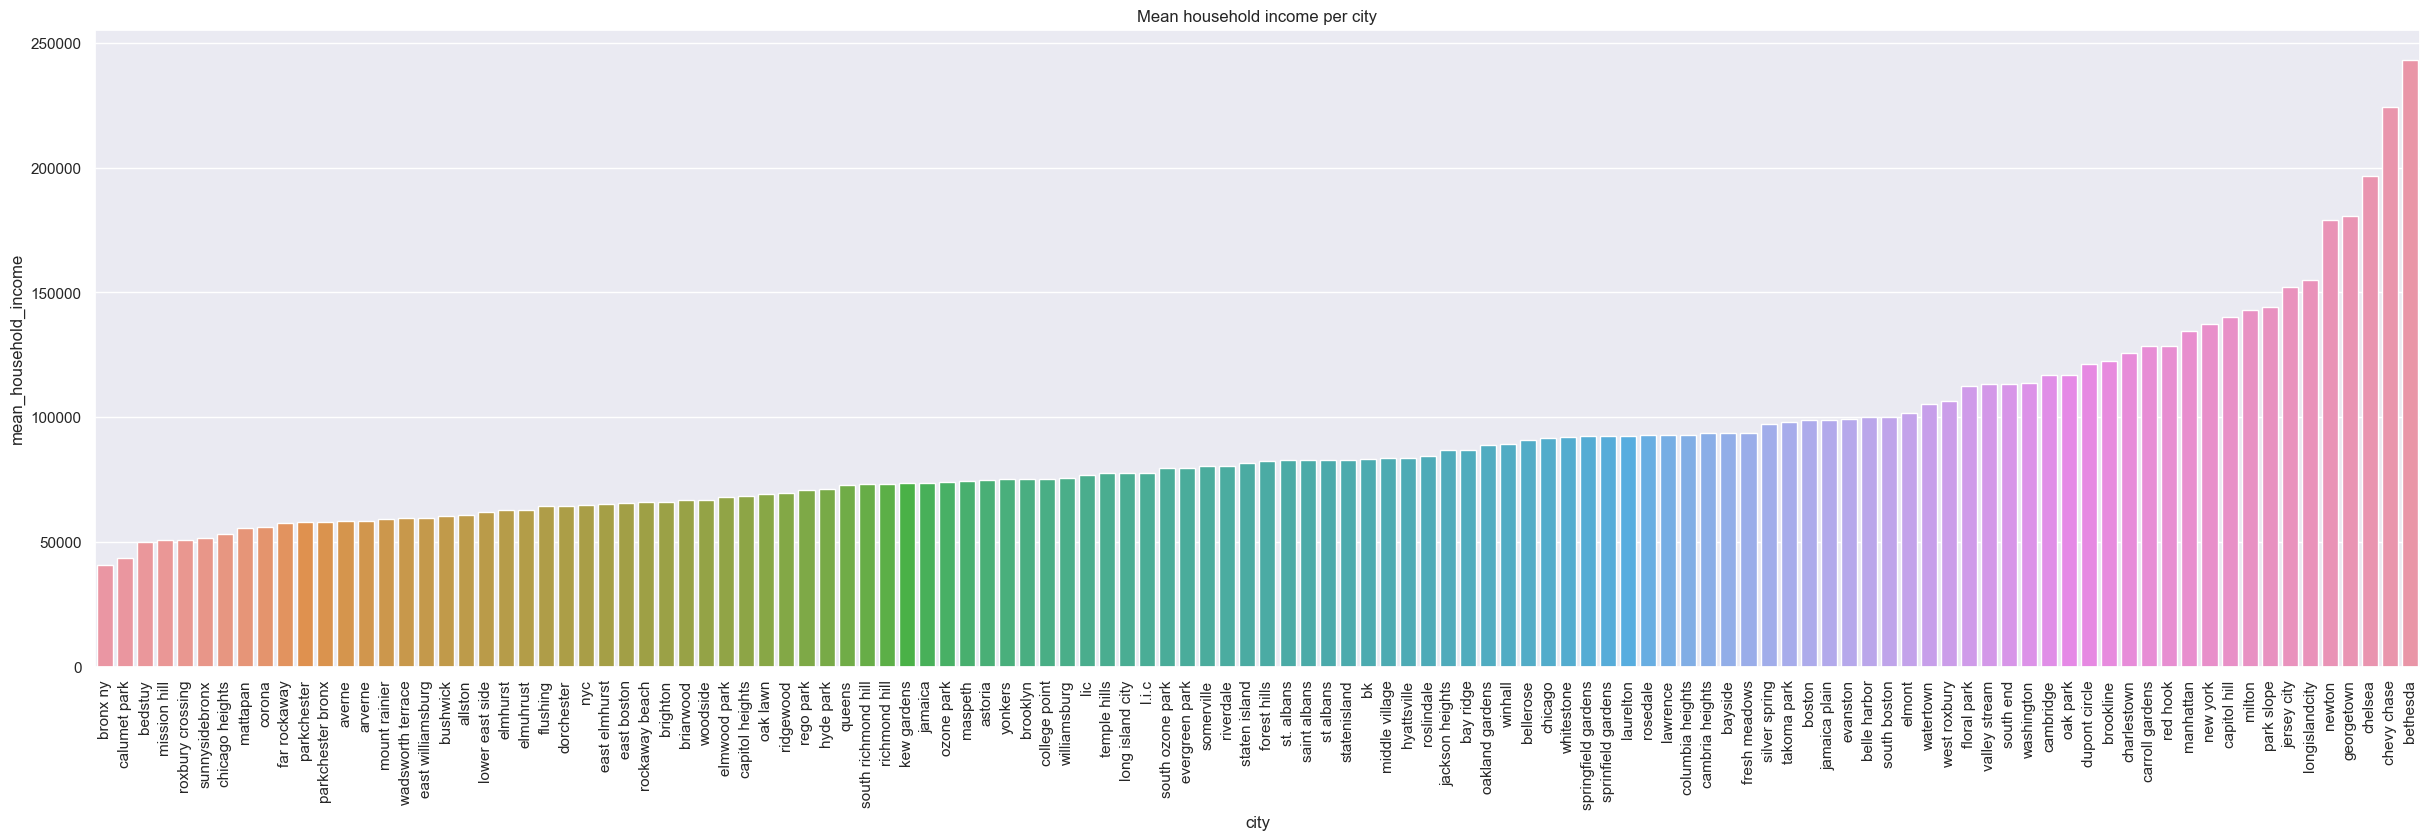

In [5]:
demographicsDF = pd.read_csv("datasets/demographics.csv")
demographicsDF3 = demographicsDF
realEstateDF = pd.read_csv("datasets/real_estate.csv.gz",compression='gzip')
realEstateDF = realEstateDF[["zipcode","city"]]
listingsDF = listingsDF[listingsDF["zipcode"].notna()]
listingsDF = listingsDF[listingsDF["zipcode"].notnull()]
listingsDF = listingsDF[listingsDF["zipcode"].str.isnumeric()]
listingsDF2 = listingsDF[["city","zipcode"]]
listingsDF2["zipcode"] = listingsDF2["zipcode"].astype(int)

demographicsDF = demographicsDF.merge(listingsDF2,on=['zipcode'])
demographicsDF = demographicsDF[demographicsDF["mean_household_income"].str.isnumeric()]
demographicsDF = demographicsDF[demographicsDF["city"].isin(list(listingsDF2["city"]))]

demographicsDF2 = demographicsDF[["city","mean_household_income"]]
demographicsDF2["mean_household_income"] = demographicsDF2["mean_household_income"].astype(int)
demographicsDF2 = demographicsDF2.groupby(by="city").mean().sort_values(by=["mean_household_income"]).reset_index()
demographicsDF4 = demographicsDF2

sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=demographicsDF2,x="city",y="mean_household_income").set(title="Mean household income per city")
plt.pyplot.xticks(rotation=90)


C:\Users\David\AppData\Local\Temp\ipykernel_10776\3164617871.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographicsDF2["median_household_income"] = demographicsDF2["median_household_income"].astype(int)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'bronx ny'),
  Text(1, 0, 'roxbury crossing'),
  Text(2, 0, 'mission hill'),
  Text(3, 0, 'calumet park'),
  Text(4, 0, 'lower east side'),
  Text(5, 0, 'bedstuy'),
  Text(6, 0, 'sunnysidebronx'),
  Text(7, 0, 'chicago heights'),
  Text(8, 0, 'nyc'),
  Text(9, 0, 'arverne'),
  Text(10, 0, 'averne'),
  Text(11, 0, 'east williamsburg

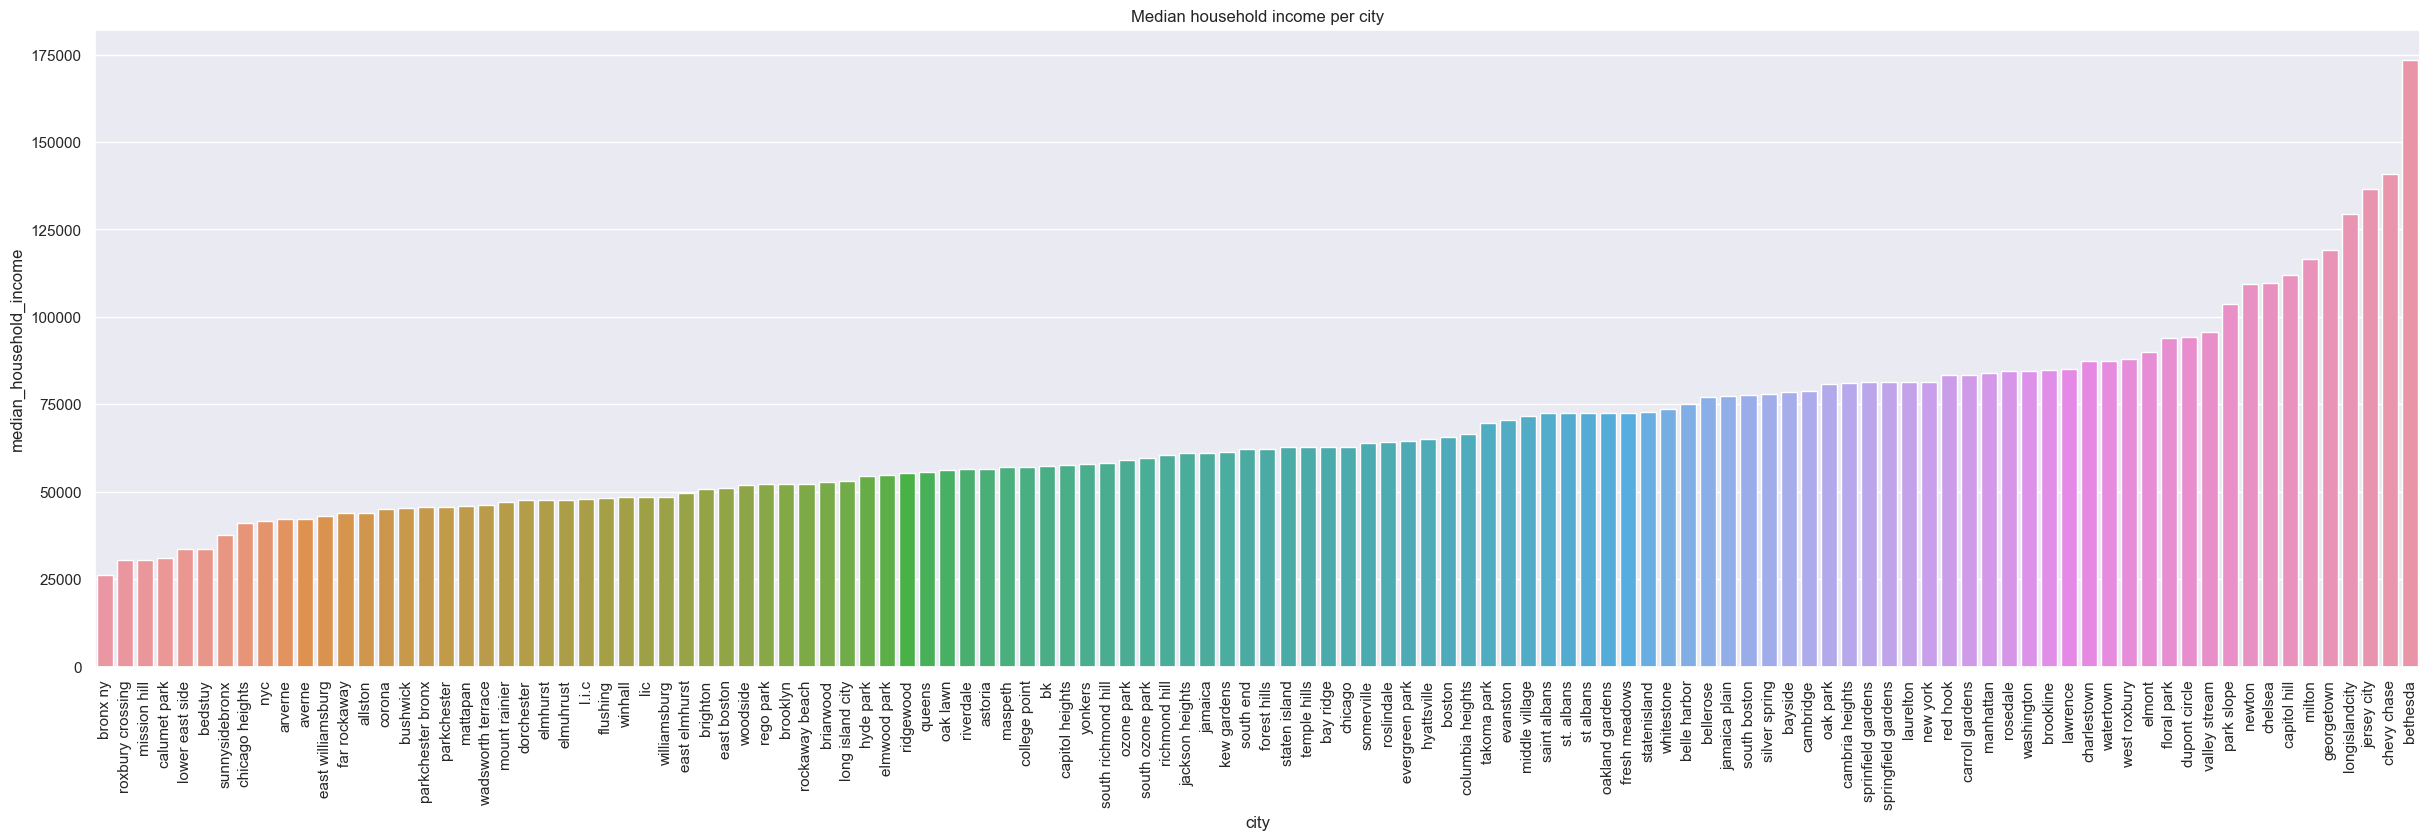

In [6]:
demographicsDF = demographicsDF3

demographicsDF = demographicsDF.merge(listingsDF2,on=['zipcode'])
demographicsDF = demographicsDF[demographicsDF["median_household_income"].str.isnumeric()]
demographicsDF = demographicsDF[demographicsDF["city"].isin(list(listingsDF2["city"]))]

demographicsDF2 = demographicsDF[["city","median_household_income"]]
demographicsDF2["median_household_income"] = demographicsDF2["median_household_income"].astype(int)
demographicsDF2 = demographicsDF2.groupby(by="city").mean().sort_values(by=["median_household_income"]).reset_index()

sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(data=demographicsDF2,x="city",y="median_household_income").set(title="Median household income per city")
plt.pyplot.xticks(rotation=90)

## *Analyzing econ_state.csv*

In [7]:
econstateDF = pd.read_csv("datasets/econ_state.csv")

westCoastStates = "CA", "WA", "OR"

#econstateDF = econstateDF[econstateDF["state"].isin(westCoastStates)]

econstateDF = econstateDF.drop(list(econstateDF.filter(regex='gdp')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='ur')),axis=1)

econstateDF = econstateDF.drop(list(econstateDF.filter(regex='19')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='200')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='2010')),axis=1)
econstateDF = econstateDF.drop(list(econstateDF.filter(regex='2016')),axis=1)

econstateColumnNames = [i for i in econstateDF.columns if 'personal_income' in i]

econstateDF[econstateColumnNames] = econstateDF[econstateColumnNames].astype(int)

econstateDF["avg_personal_income"] = econstateDF[econstateColumnNames].mean(axis=1)

econstateDF = econstateDF.sort_values(by=["avg_personal_income"])

econstateDF

,state,2011Q1_personal_income,2011Q2_personal_income,2011Q3_personal_income,2011Q4_personal_income,2012Q1_personal_income,2012Q2_personal_income,2012Q3_personal_income,2012Q4_personal_income,2013Q1_personal_income,...,2013Q4_personal_income,2014Q1_personal_income,2014Q2_personal_income,2014Q3_personal_income,2014Q4_personal_income,2015Q1_personal_income,2015Q2_personal_income,2015Q3_personal_income,2015Q4_personal_income,avg_personal_income
45,VT,26732676,27111832,27352416,27683592,27715568,28094068,27977924,28694120,28261516,...,28885188,28956180,29340276,29771452,30126428,29962512,30306496,30642244,30759004,2.877986e+07
50,WY,27535241,27830620,28280655,28722484,29469972,30271656,30211556,31786124,30554388,...,31092200,31841464,32660344,33118968,33273572,32855276,33002104,33156200,32464620,3.096761e+07
41,SD,36273332,36497068,36885536,37510056,37663080,37893824,36286084,38492288,37944004,...,37430952,38651864,39391748,39301560,39546768,40334928,40953044,41465096,41663880,3.848233e+07
1,AK,36119663,36964076,37489045,38032852,38155492,38485332,38452884,38869088,37732772,...,38201904,39446728,40046564,40451232,40971968,41339300,41527308,41460148,41516228,3.904960e+07
34,ND,32038941,32700604,33741827,34744880,37461660,38772972,39676668,41885536,39461892,...,40636448,41655084,42998196,43212032,43528112,42711108,42366144,42330044,41991456,3.965005e+07
26,MT,36982218,37398728,37922454,38490512,39406944,39711548,39916076,41075032,39862880,...,40238504,40708556,41452296,41794672,42215040,42632880,43113640,43544012,43457180,4.050593e+07
7,DE,39167539,39526780,39991097,40064324,39103536,39895868,39727572,41088824,39971084,...,41032352,41628984,42172792,42695864,43039724,44201296,45011496,45349704,45669352,4.152991e+07
8,DC,39973894,40608476,41258142,41406924,41859124,42267856,42010372,43102132,42881924,...,43572680,45530956,46222396,46806288,47195648,48388508,49156072,49631224,49927864,4.440641e+07
39,RI,45935194,46788484,46904170,46934532,48072520,48444488,48474088,49414304,48366028,...,49179656,49846828,50275444,50924808,51594016,51885948,52718956,53183888,53545212,4.950150e+07
19,ME,51281186,51416856,51874378,52283668,52351756,52967264,52748012,53443396,52359052,...,53205020,53630244,54537208,55188844,56084472,55642896,56676204,57273352,57982760,5.381405e+07


## *Analyzing calendar.csv*

In [8]:
calendarDF = pd.read_csv("datasets/calendar.csv")

20000.0


<AxesSubplot:title={'center':'price'}, xlabel='metro_area'>

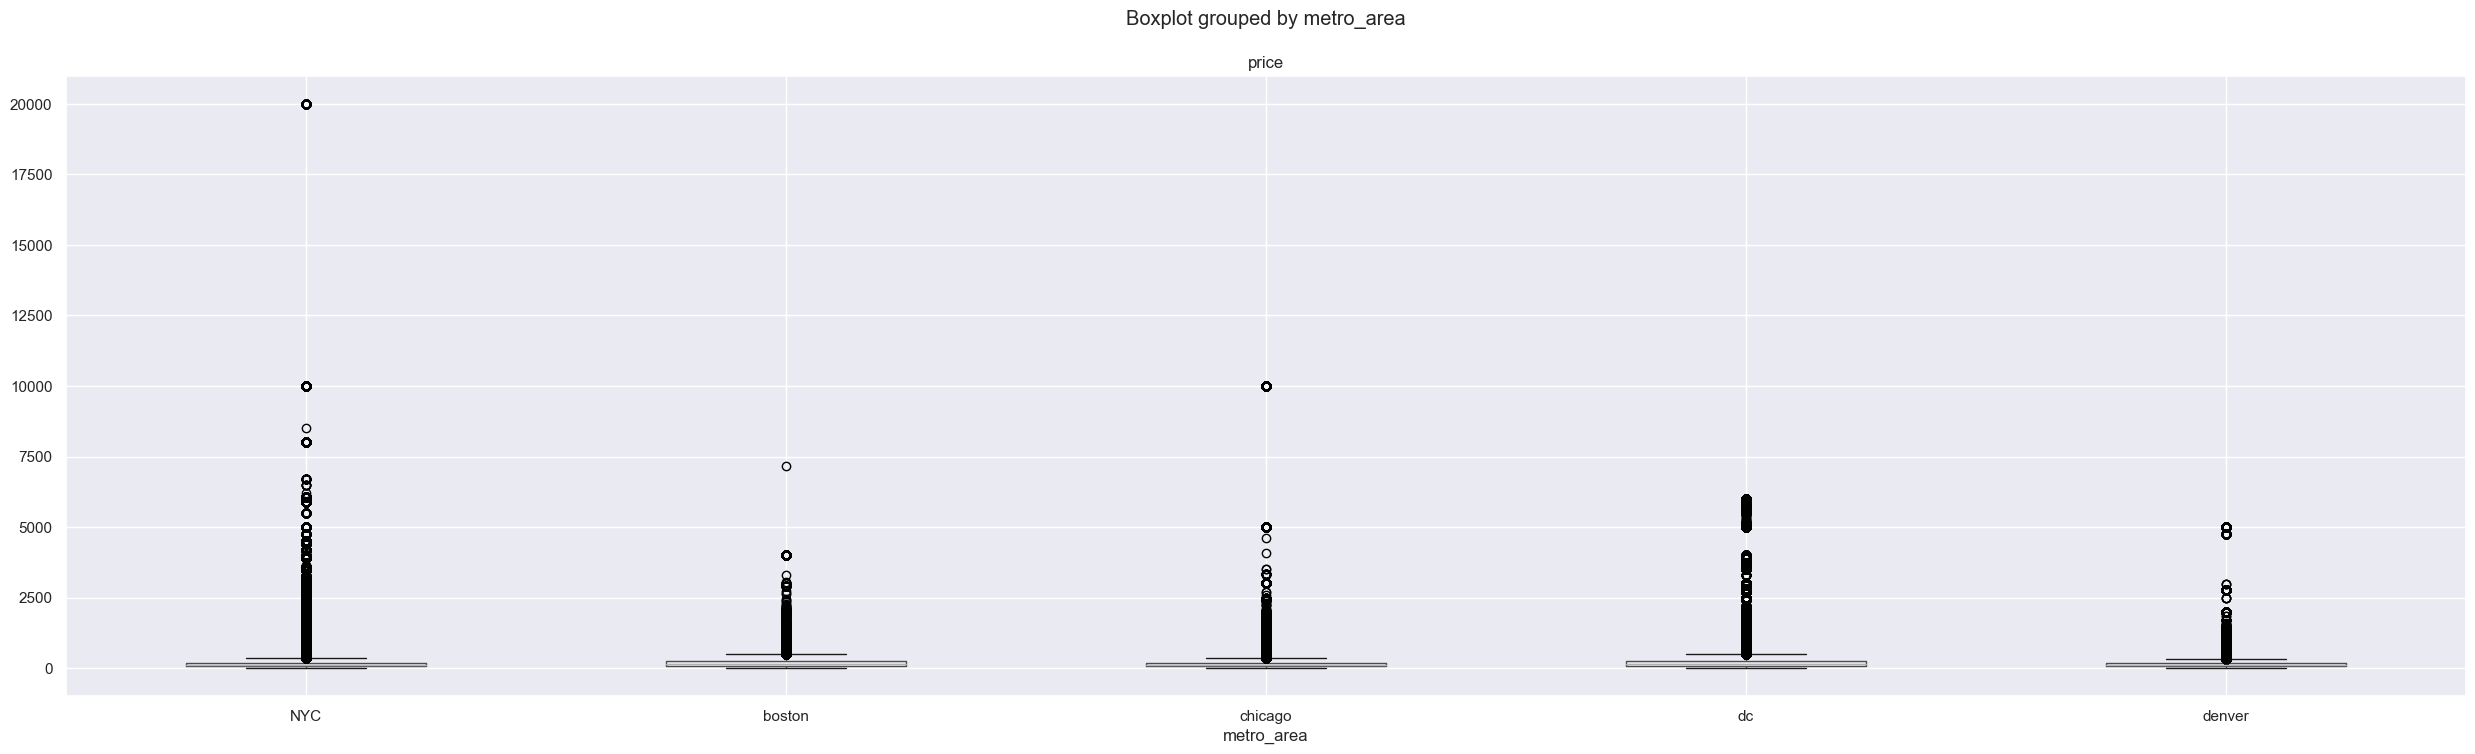

In [9]:
calendarDF = calendarDF.dropna()
calendarDF2 = calendarDF.groupby(by="metro_area").mean().reset_index().sort_values(by=["price"])
calendarDF2 = calendarDF2[["metro_area","price"]]
calendarDF2 = calendarDF2[calendarDF2["metro_area"].str.contains("denver")]
print(calendarDF["price"].max())

calendarDF.boxplot(by="metro_area",column=['price'])

#sns.boxplot(x="metro_area",y="price",data=calendarDF)



## *Analyzing venues.csv*

(-74.1, -73.5, 40.55, 41.0)

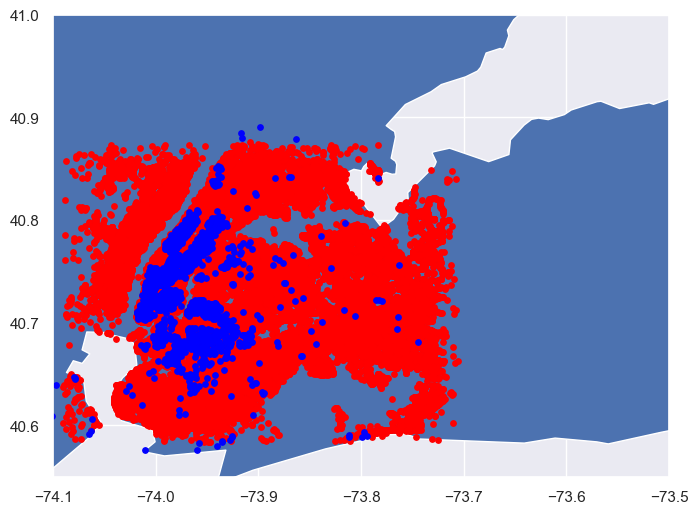

In [51]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

venuesDF = pd.read_csv("datasets/venues.csv.gz",compression="gzip")

listingsDF2 = listingsDF.sort_values(by=['price']).tail(5982)

geometry = [Point(xy) for xy in zip(venuesDF['longitude'], venuesDF['latitude'])]
gdf = GeoDataFrame(venuesDF, geometry=geometry)
geometry2 = [Point(xy) for xy in zip(listingsDF2['longitude'], listingsDF2['latitude'])]
gdf2 = GeoDataFrame(listingsDF2, geometry=geometry2)   


#this is a simple map that goes with geopandas
world = gpd.read_file('datasets/cb_2018_us_nation_5m.shp')
world = world.plot(figsize=(10, 6))
gdf.plot(ax=world, marker='o', color='red', markersize=15)
gdf2.plot(ax=world, marker='o', color='blue', markersize=15)

plt.pyplot.axis([-150, -50, 25, 50])

plt.pyplot.axis([-74.1, -73.5, 40.55, 41]) #x_min, x_max, y_min, y_max use this line for zooming using matplotlib, plotly with 300k points brings an i7 to its knees

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


130587:'point_of_interest    130588
'establishment        130588
'store                 74299
'food                  40025
'restaurant            22710
                       ...  
'mosque                    3
'hindu_temple              3
'taxi_stand                3
'police                    2
'embassy                   2
Length: 100, dtype: int64
                 rating
city                   
boston         4.100188
chicago        4.091885
denver         4.011665
new york city  4.064239
washington dc  4.001884
                   price
metropolitan            
NYC           144.892391
boston        174.442845
chicago       136.371623
dc            247.518880


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'boston'),
  Text(1, 0, 'chicago'),
  Text(2, 0, 'denver'),
  Text(3, 0, 'new york city'),
  Text(4, 0, 'washington dc')])

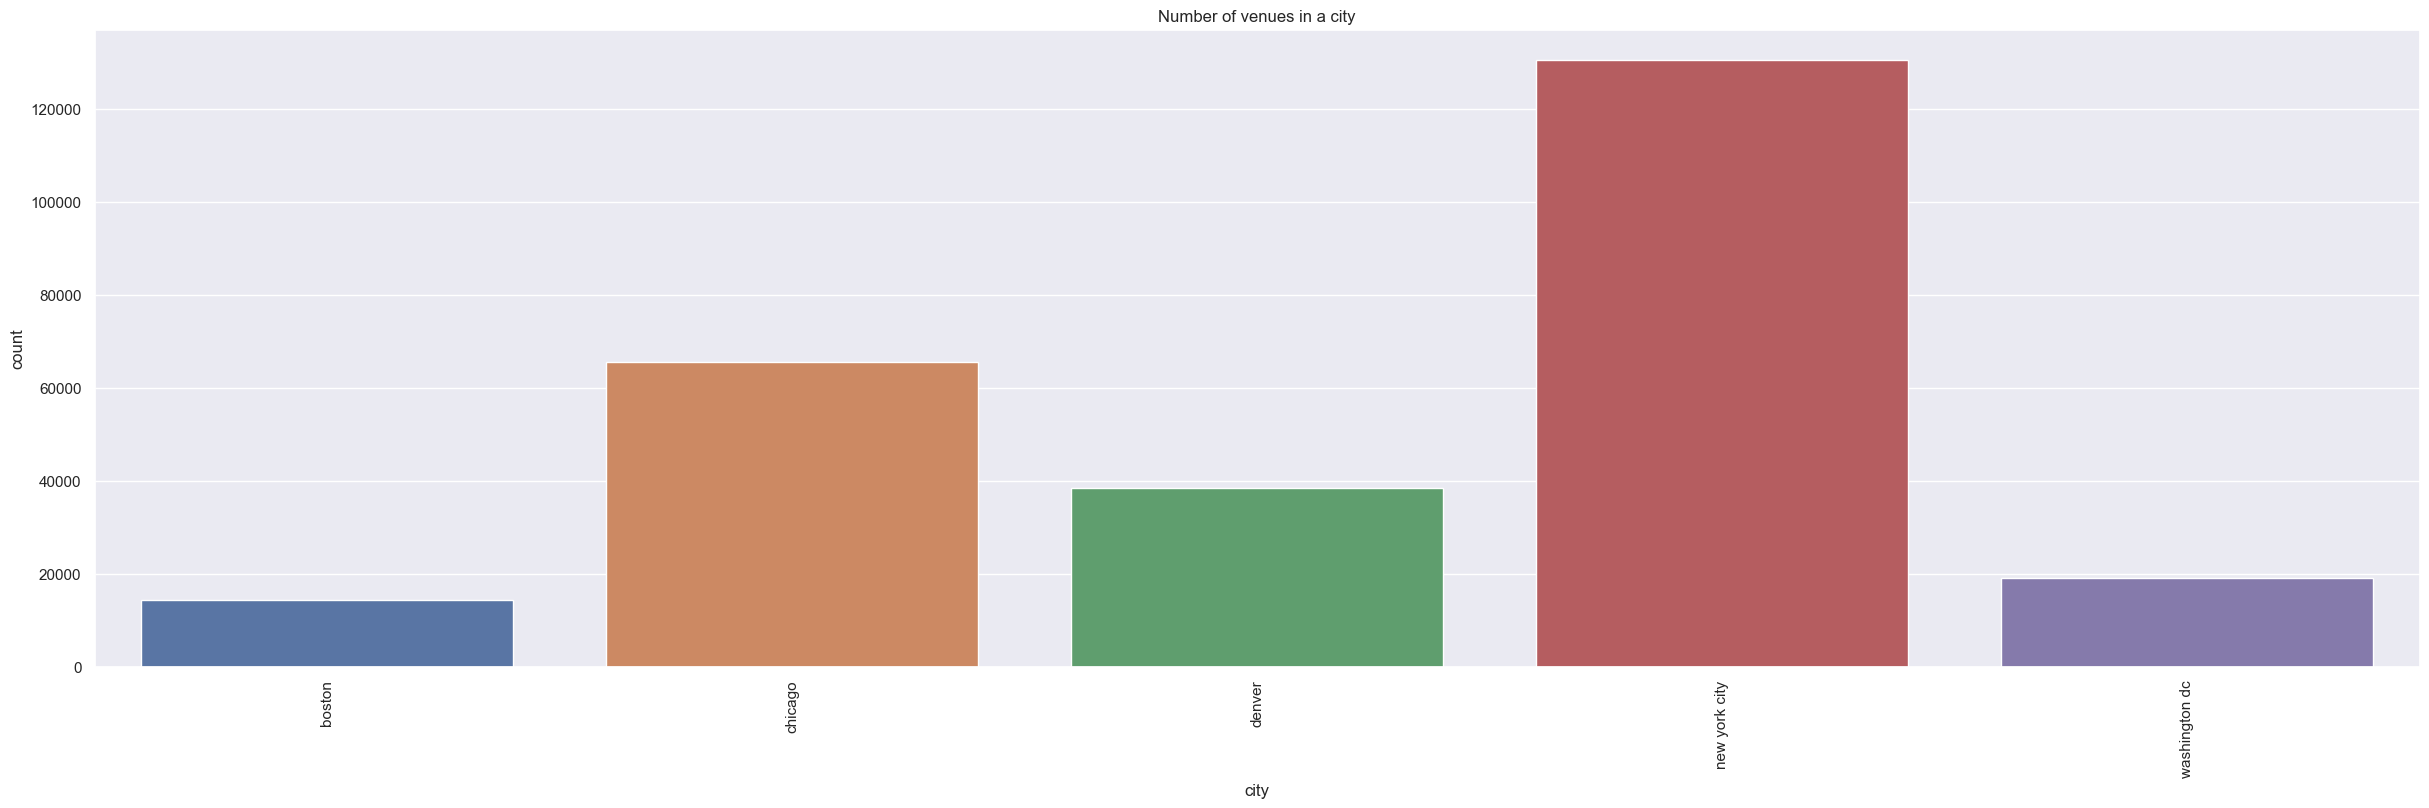

In [105]:
import math
import ast
import nltk

long1 = venuesDF['longitude'].tolist()
lat1 = venuesDF['latitude'].tolist()

nltk.download('punkt')

venuesCountDF = venuesDF.groupby(by="city").count()
venuesCountDF = venuesCountDF[['id']]
venuesCountDF = venuesCountDF.rename(columns={'id':'count'}).reset_index()

listingsCountDF = listingsDF.groupby("metropolitan").mean()
listingsCountDF = listingsCountDF[['price']]

venuesRatingDF = venuesDF.groupby(by="city").mean()
venuesRatingDF = venuesRatingDF[['rating']]

metroAreas = ["new york city"] #,"denver","chicago","boston","washington dc"
invalidtokens = ["[","'",",","]"]

for i in metroAreas:
    currentVenuesDF = venuesDF[venuesDF["city"] == i]
    currentVenueString = currentVenuesDF["types"]
    currentVenueString = currentVenueString.tolist()
    words = []
    for i in range(len(currentVenueString)):
            sentences = nltk.sent_tokenize(currentVenueString[i])
            for sentence in sentences:
                words+=nltk.word_tokenize(sentence)
    words2 = words
    words = []
    for w in words2:
        if w not in invalidtokens:
            words.append(w)
    words = pd.Series(words)
    print(str(i) + ":" + str(words.value_counts()))

print(venuesRatingDF)
print(listingsCountDF)

sns.set(rc={'figure.figsize':(30,8.27)})

sns.barplot(data=venuesCountDF,x="city",y="count").set(title="Number of venues in a city")

plt.pyplot.xticks(rotation=90)

## *Coming to conclusions*

In [106]:
listingsDF2 = listingsDF3.merge(demographicsDF2,on=['city'])
listingsDF2 = listingsDF2.merge(demographicsDF4,on=['city'])
print("Pearson Correlation Coefficient #1: " + str(listingsDF2['price'].corr(listingsDF2['median_household_income'])))
print("Pearson Correlation Coefficient #2: " + str(listingsDF2['price'].corr(listingsDF2['mean_household_income'])))

#print(listingsDF2[listingsDF2['city'].str.contains("chevy chase")])


Pearson Correlation Coefficient #1: 0.2958165283435775
Pearson Correlation Coefficient #2: 0.48759954857855536


NYC more expensive than other cities